We will develop a dynamic embeddings model that selects the appropriate embedding based on the query and the retrieved document.

In [ ]:
# !pip install sentence-transformers
# !pip install transformers



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# # !pip install duckduckgo-search
# !pip install fake-useragent

# !pip install requests


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We are utilizing `duckduckgo_search` and employing fake user agents along with comprehensive headers to minimize 403 errors. This approach allows us to successfully retrieve 5 JSON dumps.

In [1]:
import json
import random
from duckduckgo_search import DDGS
import requests
from bs4 import BeautifulSoup

class DuckDuckGoWebLoader:
    def __init__(self, query, num_results=5):
        self.query = query
        self.num_results = num_results

    def load(self):
        ddgs = DDGS()
        # Request extra search results to compensate for potential errors.
        extra_multiplier = 2
        search_results = ddgs.text(self.query, max_results=self.num_results * extra_multiplier)
        documents = []
        
        for result in search_results:
            if len(documents) >= self.num_results:
                break  # Stop once we have the desired number of valid documents

            title = result.get("title", "No Title")
            link = result.get("href")
            description = result.get("body", "")
            description = " ".join(description.split())  # Normalize spacing

            if not link:
                continue

            try:
                headers = self._generate_headers()
                response = requests.get(link, headers=headers, timeout=10)
                response.raise_for_status()
                
                soup = BeautifulSoup(response.text, "html.parser")
                content = soup.get_text(separator="\n").strip()
                content = " ".join(content.split())  # Normalize spacing
                date = "Unknown"  # Placeholder for date extraction
                
                documents.append({
                    "title": title,
                    "link": link,
                    "description": description,
                    "content": content,
                    "date": date
                })
            except Exception as e:
                print(f"Error fetching {link}: {e}")

        return documents

    def _generate_headers(self):
        # Complete set of headers with a fixed User-Agent and other common headers.
        return {
            "authority": "www.google.com",
            "accept": ("text/html,application/xhtml+xml,application/xml;q=0.9,"
                       "image/avif,image/webp,image/apng,*/*;q=0.8,"
                       "application/signed-exchange;v=b3;q=0.7"),
            "accept-language": "en-US,en;q=0.9",
            "cache-control": "max-age=0",
            "user-agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                           "AppleWebKit/537.36 (KHTML, like Gecko) "
                           "Chrome/129.0.0.0 Safari/537.36")
        }




In [2]:

query = "latest technology trends"
loader = DuckDuckGoWebLoader(query, num_results=5)
docs = loader.load()
json_output = json.dumps(docs, ensure_ascii=False, indent=2)
print(json_output)

Error fetching https://www.gartner.com/en/articles/top-technology-trends-2025: 403 Client Error: Forbidden for url: https://www.gartner.com/en/articles/top-technology-trends-2025
Error fetching https://www.weforum.org/stories/2024/06/top-10-emerging-technologies-of-2024-impact-world/: 403 Client Error: Forbidden for url: https://www.weforum.org/stories/2024/06/top-10-emerging-technologies-of-2024-impact-world/
Error fetching https://technologymagazine.com/articles/top-10-trends-of-2025: 403 Client Error: Forbidden for url: https://technologymagazine.com/articles/top-10-trends-of-2025
[
  {
    "title": "Top 25 New Technology Trends in 2025 - GeeksforGeeks",
    "link": "https://www.geeksforgeeks.org/top-new-technology-trends/",
    "description": "Top Technical Jobs in 2025. Since technology is rapidly evolving, a number of new job roles are assuming an increased importance in any industry.. 1. AI/ML Engineer. Role Description: Design algorithms and models for artificial intelligence a

In [5]:
print("Testing Math embedding model (math-similarity/Bert-MLM_arXiv-MP-class_zbMath):")
try:
    from sentence_transformers import SentenceTransformer
    def load_math_model():
        model_name = 'math-similarity/Bert-MLM_arXiv-MP-class_zbMath'
        
        model = SentenceTransformer(model_name)

       
        print("Math embedding model loaded successfully.")
        
        return model

    math_model= load_math_model()
except Exception as e:
    print("Error loading Math embedding model:", e)

Testing Math embedding model (math-similarity/Bert-MLM_arXiv-MP-class_zbMath):

Math embedding model loaded successfully.


In [ ]:



print("\nTesting CodeBERT embedding model for programming queries:")
try:
    from transformers import AutoModel, AutoTokenizer
    def load_codebert():
        model_name = "microsoft/codebert-base"
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModel.from_pretrained(model_name)
        print("CodeBERT embedding model loaded successfully.")
        return model, tokenizer
    codebert_model, codebert_tokenizer = load_codebert()
except Exception as e:
    print("Error loading CodeBERT:", e)

print("\nTesting SciBERT embedding model for scientific queries:")
try:
    from transformers import AutoModel, AutoTokenizer
    def load_scibert():
        model_name = "allenai/scibert_scivocab_uncased"
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModel.from_pretrained(model_name)
        print("SciBERT embedding model loaded successfully.")
        return model, tokenizer
    scibert_model, scibert_tokenizer = load_scibert()
except Exception as e:
    print("Error loading SciBERT:", e)

print("\nTesting MedEmbed (Bio_ClinicalBERT) for medical queries:")
try:
    from transformers import AutoModel, AutoTokenizer
    def load_medembed():
        model_name = "emilyalsentzer/Bio_ClinicalBERT"
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModel.from_pretrained(model_name)
        print("MedEmbed (Bio_ClinicalBERT) loaded successfully.")
        return model, tokenizer
    medembed_model, medembed_tokenizer = load_medembed()
except Exception as e:
    print("Error loading MedEmbed:", e)

print("\nTesting Sentence Transformers (all-MiniLM-L6-v2) for general knowledge queries:")
try:
    from sentence_transformers import SentenceTransformer
    def load_sentence_transformer():
        model_name = "all-MiniLM-L6-v2"
        model = SentenceTransformer(model_name)
        print("Sentence Transformers (all-MiniLM-L6-v2) loaded successfully.")
        return model
    sentence_transformer_model = load_sentence_transformer()
except Exception as e:
    print("Error loading Sentence Transformer:", e)



Testing CodeBERT embedding model for programming queries:
CodeBERT embedding model loaded successfully.

Testing SciBERT embedding model for scientific queries:
SciBERT embedding model loaded successfully.

Testing MedEmbed (Bio_ClinicalBERT) for medical queries:
MedEmbed (Bio_ClinicalBERT) loaded successfully.

Testing Sentence Transformers (all-MiniLM-L6-v2) for general knowledge queries:
Sentence Transformers (all-MiniLM-L6-v2) loaded successfully.


Lets Code an RF using all-MiniLM-L6-v2  embedding to implement semantic search


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric

In [2]:
df_train = pd.read_csv("combined_train.csv")

In [3]:
df_train.head()

,Question,label
0,Identify if the following statement is true or...,General-Knowledge
1,Say something encouraging to someone who faile...,General-Knowledge
2,Name three benefits of writing an effective re...,General-Knowledge
3,Generate a greeting based on the current time ...,General-Knowledge
4,"Describe a function of the immune system.? ""T...",General-Knowledge


In [7]:
rf_embedding_arr = sentence_transformer_model.encode(df_train["Question"])

In [ ]:
rf_embedding_arr.shape
pca = PCA(n_components=2)
pca.fit(rf_embedding_arr)
rf_embedding_pca = pca.transform(rf_embedding_arr)


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

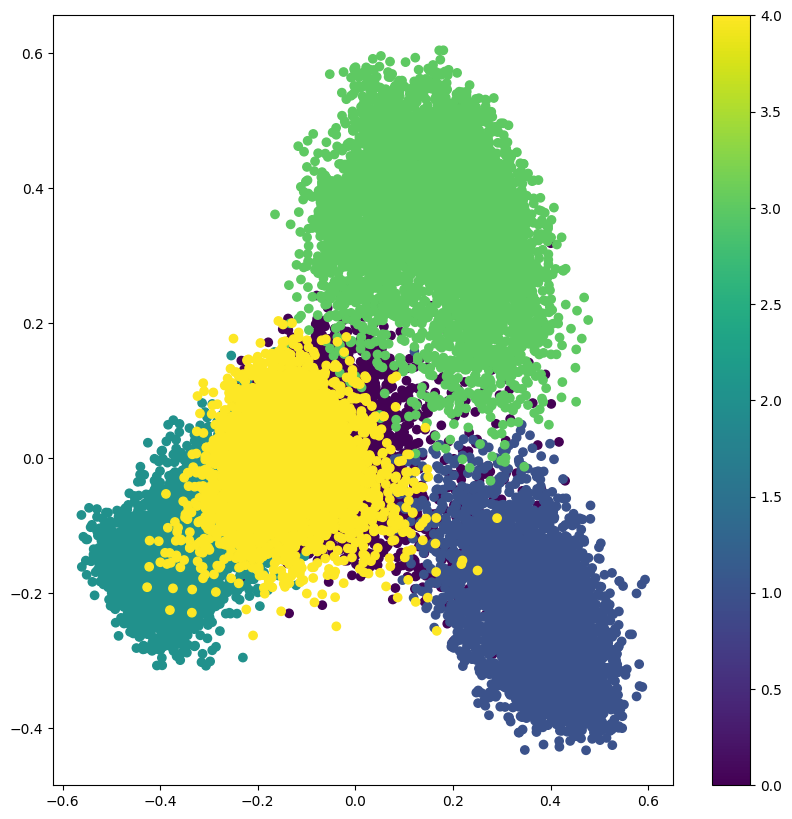

In [ ]:


# Convert labels to numerical values
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['label'])





In [ ]:
print(df_train[df_train['label_encoded'] == 0].head(1))
print(df_train[df_train['label_encoded'] == 1].head(1)) 
print(df_train[df_train['label_encoded'] == 2].head(1))
print(df_train[df_train['label_encoded'] == 3].head(1))
print(df_train[df_train['label_encoded'] == 4].head(1))
 

                                            Question              label  \
0  Identify if the following statement is true or...  General-Knowledge   

   label_encoded  
0              0  
                                               Question        label  \
5000  how many multiples of 3 are there between 100 ...  Mathematics   

      label_encoded  
5000              1  
                                                Question    label  \
10000  symptoms\nWhat are the symptoms of Raine syndr...  Medical   

       label_encoded  
10000              2  
                                                Question        label  \
15000  write a python program for its purpose\nComput...  Programming   

       label_encoded  
15000              3  
                                                Question    label  \
20000  Behaviors that are closely controlled by genes...  Science   

       label_encoded  
20000              4  
Empty DataFrame
Columns: [Question, label, label_encoded]
I

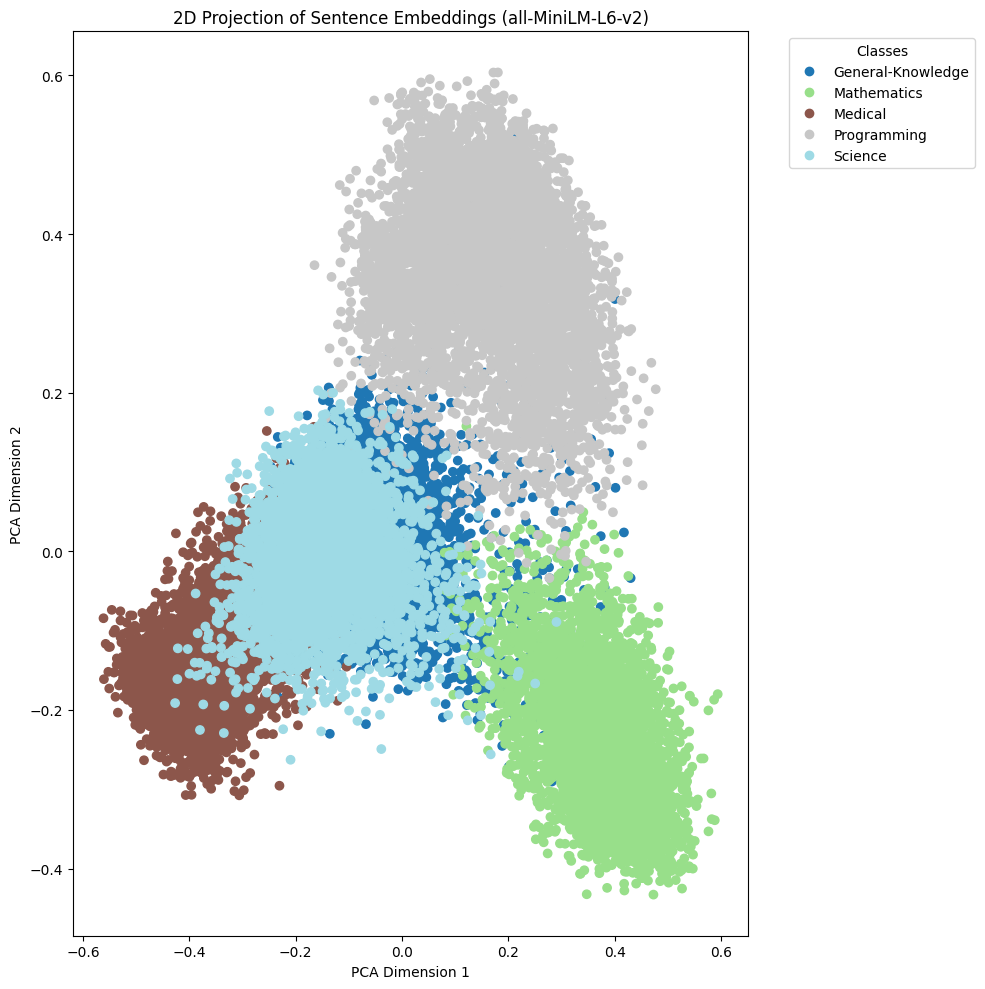

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create plot with embeddings
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    rf_embedding_pca[:, 0],  # PCA dimension 1
    rf_embedding_pca[:, 1],  # PCA dimension 2
    c=df_train['label_encoded'].values,  # Color by encoded labels
    cmap='tab20'  # Use a categorical color map
)

# Get sorted unique labels and decode them
unique_encoded_labels = np.sort(df_train['label_encoded'].unique())
decoded_labels = label_encoder.inverse_transform(unique_encoded_labels)

# Create legend with correct label-color mapping
handles = scatter.legend_elements(prop="colors")[0]
plt.legend(
    handles=handles,
    labels=decoded_labels.tolist(),
    title="Classes",
    bbox_to_anchor=(1.05, 1),  # Position legend outside
    loc='upper left'
)

# Add labels and title
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("2D Projection of Sentence Embeddings (all-MiniLM-L6-v2)")

plt.tight_layout()
plt.show()


In [ ]:
query = "What is the capital of France?" # enter your query here and test
query_embedding = sentence_transformer_model.encode(query)
query_embedding.shape

(384,)

In [ ]:
dist = DistanceMetric.get_metric('euclidean')
distances_arr = dist.pairwise(query_embedding.reshape(1,-1), rf_embedding_arr).flatten()
dist_arr_soreted = np.argsort(distances_arr)


In [ ]:
print(df_train['label'].iloc[dist_arr_soreted[:10]])

3089    General-Knowledge
1990    General-Knowledge
4661    General-Knowledge
1959    General-Knowledge
4202    General-Knowledge
1848    General-Knowledge
2318    General-Knowledge
3118    General-Knowledge
1104    General-Knowledge
2380    General-Knowledge
Name: label, dtype: object


In [ ]:
# df_train['label'].unique()

array(['General-Knowledge', 'Mathematics', 'Medical', 'Programming',
       'Science'], dtype=object)

The semantic search functionality appears to be working well. Let's proceed to implement a Random Forest (RF) model.


In [ ]:
# rf_embedding_arr.shape

(25000, 384)

In [ ]:
columns = ["col_"+str(i) for i in range(rf_embedding_arr.shape[1])]
df_train_embeddings = pd.DataFrame(rf_embedding_arr, columns=columns)
df_train_embeddings["label"] = df_train["label_encoded"]



In [ ]:
df_train_embeddings

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_375,col_376,col_377,col_378,col_379,col_380,col_381,col_382,col_383,label
0,0.102242,0.051687,0.024288,0.056203,-0.005596,-0.046439,-0.003473,0.037949,-0.006075,0.021471,...,-0.014602,-0.045375,0.098699,-0.080427,0.009379,0.020204,0.033160,0.021175,0.016899,0
1,0.038537,0.091062,0.048066,0.017653,-0.030372,0.021052,0.083691,0.049497,-0.056124,-0.063572,...,-0.031254,-0.026894,0.061309,-0.150822,0.062650,0.031863,0.090345,-0.065284,0.063158,0
2,-0.085156,0.049123,0.017065,0.006117,0.054558,0.129976,-0.063467,0.027237,-0.066035,-0.058173,...,-0.002594,0.021863,-0.030925,0.033441,-0.044868,0.087818,0.044227,-0.017253,0.021561,0
3,-0.077356,0.144167,0.066297,0.011335,-0.013881,-0.022516,0.043311,0.013614,-0.019717,-0.076648,...,0.045613,-0.006394,-0.003914,0.017533,0.014732,0.000746,0.099031,-0.021567,-0.014014,0
4,-0.013533,0.076239,-0.010044,-0.043571,-0.002802,0.080159,0.077667,0.076518,0.025170,0.043291,...,-0.021929,0.035582,-0.029339,0.035350,-0.004935,-0.024778,0.062437,0.050303,-0.042010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.025492,0.026851,-0.003771,0.042337,0.028932,0.045619,-0.066972,0.022162,-0.017782,0.047004,...,0.040240,0.019182,0.013102,0.036012,0.049116,-0.098599,0.095230,0.078293,-0.011716,4
24996,-0.027650,0.019209,0.008803,0.048358,0.059735,-0.006032,0.084988,0.043680,0.058598,0.025208,...,-0.052266,-0.025831,-0.007529,-0.012671,0.023793,0.025466,0.064283,-0.034283,0.055478,4
24997,-0.026877,-0.022132,-0.071570,0.039661,0.026054,0.035048,0.015215,0.075556,0.033915,0.007095,...,-0.005566,0.006345,0.056837,-0.050016,0.011612,0.049631,0.086694,0.041102,-0.008877,4
24998,0.150806,-0.034060,0.104326,-0.020412,0.078226,0.024091,0.042060,-0.030511,-0.007034,0.017444,...,0.035760,0.016568,-0.034859,0.099634,0.011250,0.020623,-0.043334,0.006787,0.008366,4


In [ ]:
x = df_train_embeddings.drop(columns=["label"])
y = df_train_embeddings["label"]

GRID SEARCH

In [ ]:

from tqdm import tqdm
import numpy as np



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1,verbose=2)
with tqdm(total=np.prod([len(v) for v in param_grid.values()])) as pbar:
    grid_search.fit(x, y)
    pbar.update(1)  


print(grid_search.best_params_)



  0%|          | 0/16 [00:00<?, ?it/s]

Fitting 3 folds for each of 16 candidates, totalling 48 fits


  6%|▋         | 1/16 [08:55<2:13:53, 535.55s/it]

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
print("Total combinations tested:", len(grid_search.cv_results_['params']))


Total combinations tested: 16


In [ ]:
best_rf = grid_search.best_estimator_  
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best validation accuracy: {best_score:.3f}")
print("Best parameters:", best_params)


Best validation accuracy: 0.954
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:

df_test = pd.read_csv("combined_test.csv")
df_test.head()


,Question,label
0,What is a 9-digit number that is divisible by ...,General-Knowledge
1,Who was the first Indian to win the Nobel Priz...,General-Knowledge
2,Explain why disruptive technologies are import...,General-Knowledge
3,How does the brain recognize faces?? The brai...,General-Knowledge
4,Create a list of strategies to combat stress.?...,General-Knowledge


In [9]:
rf_embedding_arr_test = sentence_transformer_model.encode(df_test["Question"])

In [13]:

df_test['label_encoded'] = label_encoder.fit_transform(df_test['label'])

In [ ]:
# rf_embedding_arr_test.shape

(5000, 384)

In [14]:
columns_test = ["col_"+str(i) for i in range(rf_embedding_arr_test.shape[1])]
df_test_embeddings = pd.DataFrame(rf_embedding_arr_test, columns=columns_test)
df_test_embeddings["label"] = df_test["label_encoded"]



In [15]:
df_test_embeddings

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_375,col_376,col_377,col_378,col_379,col_380,col_381,col_382,col_383,label
0,-0.017506,0.010156,-0.013185,-0.002466,-0.001956,0.078048,0.054982,0.057210,-0.104909,0.048180,...,-0.103715,0.001345,0.056137,-0.020645,0.075377,0.067256,0.020145,0.035810,0.005808,0
1,-0.058793,0.009209,-0.022786,0.142547,-0.019341,0.014853,0.044258,0.061040,-0.027747,0.005767,...,0.006559,-0.020659,-0.075519,-0.065295,-0.002543,0.079153,-0.000721,-0.010542,0.022610,0
2,0.070776,0.041063,0.070918,-0.055625,0.064412,0.064599,0.029739,0.039415,-0.081694,0.005303,...,0.045627,0.058160,0.027370,-0.023778,-0.017379,0.142800,0.031846,0.081945,-0.010075,0
3,-0.004202,0.016533,0.024954,-0.053304,0.025974,0.061549,0.037850,-0.059901,-0.009719,-0.033369,...,0.043868,0.006820,-0.023321,0.028144,-0.013797,0.001439,0.155114,0.033131,-0.052081,0
4,0.021559,0.028482,0.029551,0.073905,0.030188,0.023975,0.037940,-0.013215,-0.017619,-0.053286,...,0.025476,-0.005032,0.009128,0.009826,0.000121,0.039324,-0.034854,-0.050859,0.028280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.051524,-0.100746,0.039617,0.019802,0.000489,0.035446,-0.021080,-0.011171,-0.000308,-0.067802,...,-0.031976,0.004581,0.022904,0.019730,-0.001794,0.052118,0.066723,0.116169,0.027304,4
4996,-0.087933,0.012211,-0.050593,0.018403,-0.112424,-0.068982,-0.032901,0.001910,-0.052691,0.115661,...,0.023493,0.069654,0.013272,-0.019199,0.057426,-0.033203,-0.026943,0.018217,0.022269,4
4997,-0.063162,-0.016349,0.021334,-0.054549,-0.041436,0.014709,-0.139873,0.105384,0.008120,0.029277,...,0.045204,-0.000996,-0.084840,-0.018582,0.015199,0.074664,-0.059691,0.155293,-0.071780,4
4998,-0.018989,0.030120,0.094916,0.137756,-0.049868,-0.098536,-0.021831,0.033446,0.026220,0.054917,...,-0.008306,0.004186,-0.039761,-0.000766,-0.031444,-0.052963,0.032785,-0.045729,0.064771,4


In [16]:
x_test = df_test_embeddings.drop(columns=["label"])
y_test = df_test_embeddings["label"]

In [19]:

best_rf

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = best_rf.predict(x_test)

# Evaluate
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {test_accuracy:.3f}")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Test accuracy: 0.953

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1000
           1       0.97      1.00      0.99      1000
           2       0.96      0.98      0.97      1000
           3       0.99      0.99      0.99      1000
           4       0.90      0.92      0.91      1000

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



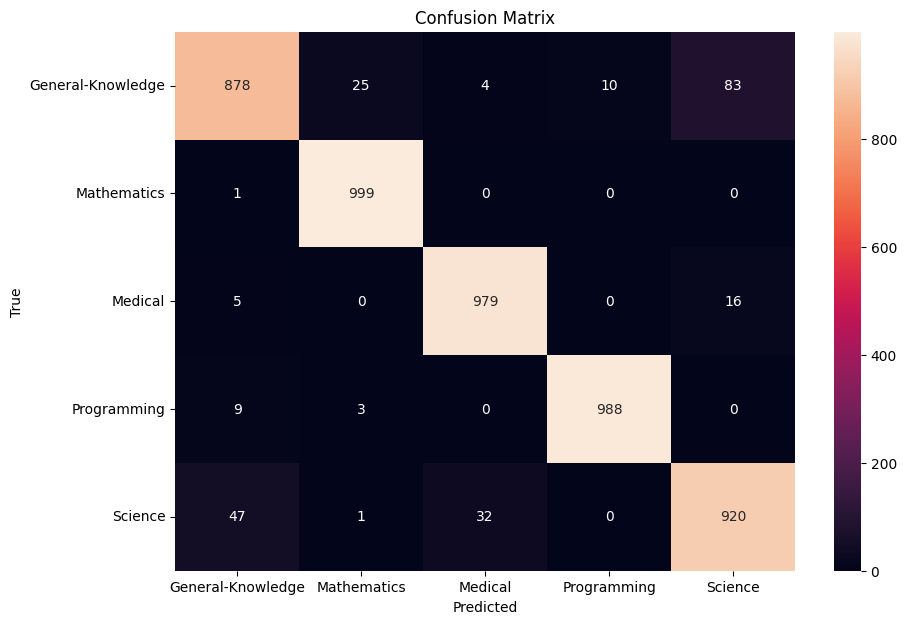

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
#load the model
import joblib
# joblib.dump(best_rf, 'best_rf_model.pkl')
best_rf = joblib.load('best_rf_model.pkl')

# joblib.dump(label_encoder, 'label_encoder.pkl')
label_encoder = joblib.load('label_encoder.pkl')

Lets Setup an Chromadb to index this embeddings appropraitely 

In [ ]:
# %pip install chromadb

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: chromadb in c:\users\kulka\.conda\envs\qf_lama\lib\site-packages (0.6.3)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


graph TD
    A[User Query] --> B{Classify Query via RF}
    B -->|Domain ≠ General-Knowledge| C[Re-Embed Query + JSON Docs via Domain-Specific Model]
    B -->|Domain = General-Knowledge| D[Use Universal Embedding for Query + JSON Docs]
    C --> E[Push Domain-Specific Embeddings to ChromaDB]
    D --> E
    E --> F[Retrieve Results]


In [ ]:
import re
import chromadb
from chromadb.config import Settings


def classify_query(query):
    """Classify the query into a domain and return the domain."""
    general_embedding = sentence_transformer_model.encode(query).reshape(1, -1)
    predicted_label = best_rf.predict(general_embedding)
    decoded_category = label_encoder.inverse_transform(predicted_label)[0]
    print(f"Query classified as: {decoded_category}")
    return decoded_category

def get_embedding_model(domain):
    """Return the embedding model and tokenizer for the given domain."""
    if domain == "Medical":
        return medembed_model, medembed_tokenizer
    elif domain == "Mathematics":
        return math_model, None  # SentenceTransformer has no tokenizer
    elif domain == "Programming":
        return codebert_model, codebert_tokenizer
    elif domain == "Science":
        return scibert_model, scibert_tokenizer
    else:
        return sentence_transformer_model, None  # Universal model

def preprocess_text(text):
    """Basic text preprocessing."""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip().lower()

def embed_text(text, model, tokenizer=None):
    """Embed text using the specified model and tokenizer."""
    if tokenizer:  
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).detach().numpy()[0]
    else:  
        return model.encode(text)

# --------------------- Main Function ------------------------

def main():
    # Get query and classify domain
    query = input("Enter your query: ")
    domain = classify_query(query)
    
    # Get embedding model for this domain
    model, tokenizer = get_embedding_model(domain)
    
    # Embed the query
    query_embedding = embed_text(query, model, tokenizer)
    print("Query embedding shape:", query_embedding.shape)
    
   
    loader = DuckDuckGoWebLoader(query, num_results=5)
    docs = loader.load()
    json_output = json.dumps(docs, ensure_ascii=False, indent=2)
    print(json_output)
    json_dump = json.loads(json_output)
    print(json_dump)
    
    
    # Initialize ChromaDB (ephemeral)
    client = chromadb.EphemeralClient()
    collection = client.create_collection(
    name="documents",
    metadata={"hnsw:space": "cosine"}  #
)
    
    # Process and index documents
    ids, embeddings, metadatas,docs_texts = [], [], [],[]
    for doc in json_dump:
        text = doc["content"]
        preprocessed = preprocess_text(text)
        embedding = embed_text(preprocessed, model, tokenizer).tolist()
        
        ids.append(doc["link"])
        embeddings.append(embedding)
        metadatas.append({"title": doc["title"], "source": doc["link"]})
        docs_texts.append(text) 
    
    # Add documents to ChromaDB
        collection.add(ids=ids, embeddings=embeddings, metadatas=metadatas,documents=docs_texts)
        print(f"Indexed {collection.count()} documents.")

     
    # Query the collection
    results = collection.query(
        query_embeddings=[query_embedding.tolist()],
        n_results=5,
        include=["documents","metadatas", "distances"]  # Include distances to compute similarity
    )

    
    print("\nTop search results:")
    for i, metadata in enumerate(results["metadatas"][0]):
        similarity_score = 1 - results["distances"][0][i]  # Convert distance to similarity
        print(f"Title: {metadata['title']}")
        print(f"Source: {metadata['source']}")
        print(f"Cosine Similarity: {similarity_score:.3f}\n")  # Adjusted label

    context_documents = results["documents"][0][0]
    
    
    final_prompt = "Query: " + query + "\nContext: " + context_documents
    print("\nFinal prompt to be passed to the LLM:")
    print(final_prompt)


    # Delete an existing collection
    # client.delete_collection(name="documents")


    

if __name__ == "__main__":
    main()


c:\Users\kulka\.conda\envs\QF_lama\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Query classified as: Mathematics
Query embedding shape: (768,)
Error fetching https://leetcode.com/problems/two-sum/: 403 Client Error: Forbidden for url: https://leetcode.com/problems/two-sum/
[
  {
    "title": "Two Sum - Leetcode Solution - CodingBroz",
    "link": "https://www.codingbroz.com/two-sum-leetcode-solution/",
    "description": "Now, let's see the leetcode solution of 1. Two Sum - Leetcode Solution. Two Sum - Leetcode Solution. We are going to solve the problem using Priority Queue or Heap Data structure ( Max Heap). Let's see the solution. 1. Two Sum - Solution in Java. This is an O(N) complexity solution.",
    "content": "Two Sum - Leetcode Solution - CodingBroz Skip to content CodingBroz Coding Made Simple Home Blog Coding Tips HackerRank Menu Toggle 10 Days of JavaScript 10 Days of Statistics 30 Days of Code HackerRank Algorithms HackerRank Linux Shell HackerRank C HackerRank C++ HackerRank Java HackerRank Python HackerRank Ruby HackerRank SQL HackerRank Functional 

Add of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Insert of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Add of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Insert of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Insert of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Add of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-8097f4ae3352
Ins

Indexed 1 documents.
Indexed 2 documents.
Indexed 3 documents.
Indexed 4 documents.


Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-8097f4ae3352
Add of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answer-s-walkthrough-0aa8b87875e9
Insert of existing embedding ID: https://www.codingbroz.com/two-sum-leetcode-solution/
Insert of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Insert of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-8097f4ae3352
Insert of existing embedding ID: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answer-s-walkthrough-0aa8b87875e9


Indexed 5 documents.

Top search results:
Title: Solving LeetCode Two Sum: A C++ Guide | Medium
Source: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answer-s-walkthrough-0aa8b87875e9
Cosine Similarity: 0.849

Title: Two Sum in C#: LeetCode Solutions | Medium
Source: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-8097f4ae3352
Cosine Similarity: 0.797

Title: Solving Two Sum: C Code Walkthrough | Medium
Source: https://medium.com/@AlexanderObregon/solving-the-two-sum-problem-on-leetcode-c-answers-walkthrough-715066492a7a
Cosine Similarity: 0.793

Title: Two Sum - Leetcode #1 Short & Simple Solution - Code Recipe
Source: https://www.code-recipe.com/post/two-sum
Cosine Similarity: 0.792

Title: Two Sum - Leetcode Solution - CodingBroz
Source: https://www.codingbroz.com/two-sum-leetcode-solution/
Cosine Similarity: 0.504


Final prompt to be passed to the LLM:
Query: write a code of Two sum problem from le

In [ ]:
#  # Delete an existing collection
# client.delete_collection(name="documents")